# Analysis

There are two classes for analysis: Alternative which provides methods for a [Cost Benefit Analysis](https://en.wikipedia.org/wiki/Cost–benefit_analysis) and Decision which provides methods for a [Multiple Criteria Analysis](https://en.wikipedia.org/wiki/Multiple-criteria_decision_analysis). The Timeline class generates a [Gantt Chart](https://en.wikipedia.org/wiki/Gantt_chart).

## Cost Benefit Analysis

In [1]:
from datetime import datetime, timedelta
from dpd.analysis import Activity, Alternative, Currency

USD = Currency("USD", 2020, 0.07).discount()

a1 = Alternative(name="Alternative One")
planning = Activity(
    "Planning", datetime(2005, 1, 1), datetime(2009, 12, 31), 100 * USD, 0 * USD
)
construction = Activity(
    "Construction", datetime(2010, 1, 1), datetime(2014, 12, 31), 100 * USD, 0 * USD
)
operations = Activity(
    "Operations",
    construction.End,
    construction.End + timedelta(days=365 * 20 + 4),
    0 * USD,
    400 * USD,
)

for activity in [planning, construction, operations]:
    a1.add_activity(activity)

a1

,Start,End,Cost,Benefit
Planning,2005-01-01,2009-12-31,100.0 USD,0.0 USD
Construction,2010-01-01,2014-12-31,100.0 USD,0.0 USD
Operations,2014-12-31,2034-12-30,0.0 USD,400.0 USD


In [2]:
a1.benefit_cost_ratio

<Quantity 2.>

In [3]:
a1.period_range_pivot().head()

Cost                          Benefit                        
      Planning Construction Operations Planning Construction Operations
2005  20.0 USD          NaN        NaN  0.0 USD          NaN        NaN
2006  20.0 USD          NaN        NaN  0.0 USD          NaN        NaN
2007  20.0 USD          NaN        NaN  0.0 USD          NaN        NaN
2008  20.0 USD          NaN        NaN  0.0 USD          NaN        NaN
2009  20.0 USD          NaN        NaN  0.0 USD          NaN        NaN

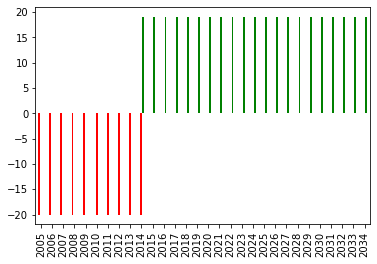

In [4]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots()

a1.cash_flow_diagram(ax=ax)
ax.get_legend().remove()

## Timeline

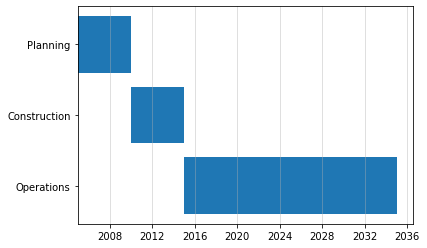

In [5]:
from dpd.analysis import Timeline

t = Timeline()
for activity in [planning, construction, operations]:
    t.add_activity(activity)

fig, ax = plt.subplots()
t.plot_gantt(ax=ax)
plt.show()

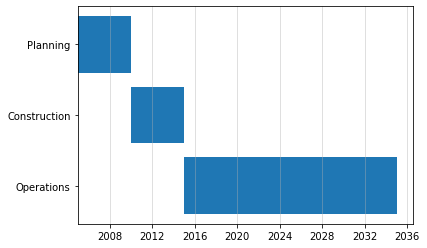

In [6]:
fig, ax = plt.subplots()
a1.timeline.plot_gantt(ax=ax)
plt.show()

## Decision

In [7]:
from datetime import datetime
from random import randint

from astropy import units

from dpd.analysis import Alternative, Currency, Decision
from dpd.analysis.criteria import AttributeCriterion, CostCriterion, Criterion

USD = Currency("USD", 2020, 0.07).discount()
decision = Decision()

no_build_alternative = Alternative("No Build Alternative")
no_build_alternative.some_cost = 0 * USD
alternative_one = Alternative("Alternative 1")
alternative_one.some_cost = 100 * USD
alternative_two = Alternative("Alternative 2")
alternative_two.some_cost = 200 * USD


@property
def travel_time(self):
    return randint(100, 200) * units.second


setattr(Alternative, "travel_time", travel_time)

decision.add_criterion(AttributeCriterion("Travel Time", weight=1 / units.second))
decision.add_criterion(
    Criterion("Distance", lambda x: 200 * units.meter, weight=1 / units.meter)
)
decision.add_criterion(AttributeCriterion("Some Cost", weight=1 / USD))

for alternative in [no_build_alternative, alternative_one, alternative_two]:
    decision.add_alternative(alternative)

decision

,Travel Time,Distance,Some Cost
No Build Alternative,200.0 s,200.0 m,0.0 USD
Alternative 1,124.0 s,200.0 m,100.0 USD
Alternative 2,133.0 s,200.0 m,200.0 USD


<AxesSubplot:>

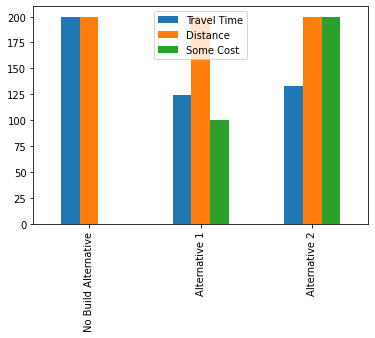

In [8]:
decision.plot(kind="bar")

<AxesSubplot:>

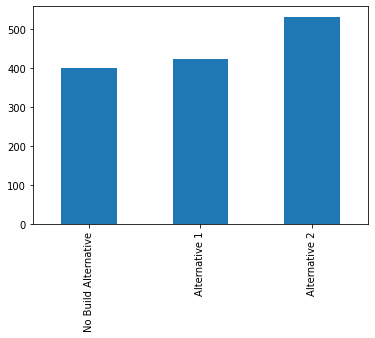

In [9]:
decision.multiple_criteria_decision_analysis().plot(kind="bar")